In [6]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats

In [ ]:
from feature_extraction_helper import reshape_feature_array, combine_and_sort_indices, calculate_periods_between_peaks

## Load data

In [20]:
master_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Raw_Data')

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths

[WindowsPath('//portulab.synology.me/data/Kata/testdata/Raw_Data/240423_f0')]

In [21]:
fish= 0
fish_id =  fish_paths[fish].name
exp_name = Path(fish_paths[fish]).parts[-2]
exp_name = 'testfish'
fish_id, exp_name


('240423_f0', 'testfish')

In [22]:
out_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Processed_Data')
save_data_path = out_path

In [23]:
t_feature_vector_array = fl.load(save_data_path/ '{}_t_feature_vector_array.h5'.format(fish_id))
l_feature_vector_array = fl.load(save_data_path/ '{}_l_feature_vector_array.h5'.format(fish_id))
r_feature_vector_array = fl.load(save_data_path/ '{}_r_feature_vector_array.h5'.format(fish_id))

In [24]:
## tail, left fin, right fin

traces =  fl.load(out_path / '{}_tensor.h5'.format(fish_id))
traces.shape

(500, 3, 50)

In [25]:
max_n = int(l_feature_vector_array.shape[1]/4)
max_n

9

In [26]:
t_reshaped_array, t_peaks_a_array, t_peaks_i_array, t_valleys_a_array, t_valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)


Reshaped array shape: (500, 4, 9)
Reshaped array shape: (500, 4, 9)
Reshaped array shape: (500, 4, 9)


### Extract full beat periods

In [27]:
fps = 200

Laterality: right


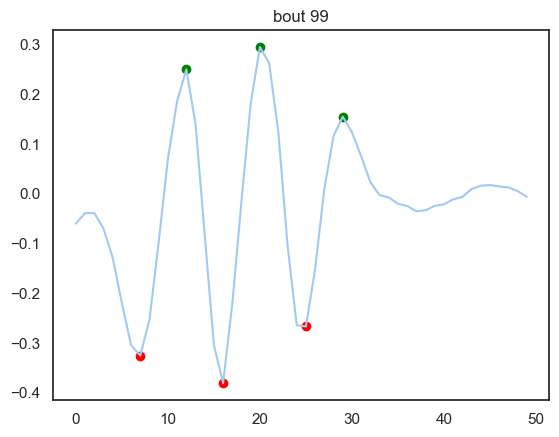

In [46]:
data = traces[:,0,:]
bout = np.random.randint(0,data.shape[0])

plt.figure()
plt.plot(data[bout, :])
plt.scatter(t_peaks_i_array[bout], t_peaks_a_array[bout], c='green')
plt.scatter(t_valleys_i_array[bout], t_valleys_a_array[bout], c='red')
plt.title('bout {}'.format(bout))

# Access the first row of each array
peaks_first = t_peaks_a_array[bout, 0]
valleys_first = t_valleys_a_array[bout, 0]

# Compare and determine laterality
laterality = np.where( np.abs(peaks_first) > np.abs(valleys_first), 'left', 'right')

print("Laterality:", laterality)

In [31]:
periods_array = calculate_periods_between_peaks(t_peaks_i_array, fps)
periods_array[bout]

array([0.05 , 0.035,   nan,   nan,   nan,   nan,   nan,   nan,   nan])

### Calculate half beats

In [33]:
# Step 1: Combine and sort indices
sorted_indices_array = combine_and_sort_indices(t_peaks_i_array, t_valleys_i_array)

# Step 2: Calculate periods between sorted indices
half_beats_array = calculate_periods_between_peaks(sorted_indices_array, fps)


In [34]:
half_beats_array[bout]

array([0.025, 0.025, 0.015, 0.02 ,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])

In [35]:
fl.save(save_data_path/ '{}_t_full_beats.h5'.format(fish_id), periods_array)
fl.save(save_data_path/ '{}_t_half_beats.h5'.format(fish_id), half_beats_array)

### For fins

In [36]:
periods_array = calculate_periods_between_peaks(l_peaks_i_array, fps)
sorted_indices_array = combine_and_sort_indices(l_peaks_i_array, l_valleys_i_array)
half_beats_array = calculate_periods_between_peaks(sorted_indices_array, fps)

In [38]:
fl.save(save_data_path/ '{}_l_full_beats.h5'.format(fish_id), periods_array)
fl.save(save_data_path/ '{}_l_half_beats.h5'.format(fish_id), half_beats_array)

In [39]:
periods_array = calculate_periods_between_peaks(r_peaks_i_array, fps)
sorted_indices_array = combine_and_sort_indices(r_peaks_i_array, r_valleys_i_array)
half_beats_array = calculate_periods_between_peaks(sorted_indices_array, fps)

In [40]:
fl.save(save_data_path/ '{}_r_full_beats.h5'.format(fish_id), periods_array)
fl.save(save_data_path/ '{}_r_half_beats.h5'.format(fish_id), half_beats_array)